# Predicting Telecom Customer Churn

**Project Group #5 - Milestone 2**

## Table of Contents

1. [Data Acquisition](#Data-Acquisition)

2. [Data Exploration](#Data-Exploration)

3. [Data Missingness](#Data-Missingness)

4. [Data Imputation](#Data-Imputation)

5. [Data Imbalance](#Data-Imbalance)

6. [Data Scaling](#Data-Scaling)

7. [Milestone 2 Summary](#Milestone-2-Summary)


## Data Acquisition

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Load data into a DataFrame
file_path = "./data/"
train_churn_df = pd.read_csv(file_path + "cell2celltrain.csv")
test_churn_df = pd.read_csv(file_path + "cell2cellholdout.csv")



## Data Exploration
1. **Data Overview**
    - Summarise the dataset, listing the number of rows and columns, types of variables (quantitative vs. categorical), and a brief description of each feature.
- **Statistical Summary**
    - Generate basic statistics (mean, median, standard deviation, min, max) for numerical columns to identify any irregularities in data distribution.


In [3]:
# Display data shape
print(f"Train Data Shape: {train_churn_df.shape}")
print(f"Test Data Shape: {test_churn_df.shape}")
print (f"Test Percentage: {round(test_churn_df.shape[0]/(train_churn_df.shape[0] + test_churn_df.shape[0]), 4)}")

Train Data Shape: (51047, 58)
Test Data Shape: (20000, 58)
Test Percentage: 0.2815


We have 51k observations in the train and 20k observations in the test set. The percentage of data in the test set is about 28%. 

In [4]:
# Display sample data
print("Sample Data:")
train_churn_df.head()

Sample Data:


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [5]:
# Data Schema
print("\nData Information:")
print(train_churn_df.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          

In [38]:
# Separate quantitative and categorical variables
quantitative_columns = train_churn_df.select_dtypes(include=['float64']).columns
quantitative_discrete_columns = train_churn_df.select_dtypes(include=['int64']).columns
categorical_columns = train_churn_df.select_dtypes(include=['object']).columns

print("\nQuantitative Variables:", list(quantitative_columns))
print("Total Quantitative-Continuous Variables:", len(quantitative_columns))

print("\nQuantitative Discrete Variables:", list(quantitative_discrete_columns))
print("Total Quantitative-Discrete Variables:", len(quantitative_discrete_columns))

print("\nCategorical Variables:", list(categorical_columns))
print("Total Categorical Variables:", len(categorical_columns))


Quantitative Variables: ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2']
Total Quantitative-Continuous Variables: 26

Quantitative Discrete Variables: ['CustomerID', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating']
Total Quantitative-Discrete Variables: 9

Categorical Variables: ['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'O

### Data Type Distribution

In [24]:
plot_data = pd.DataFrame(
    {
       "categories": ["Quantitative", "Quantitative Discrete", "Categorical"],
        "counts": [len(quantitative_columns), len(quantitative_discrete_columns), len(categorical_columns)]
    },
    index=list(range(3))
).sort_values(by="counts", ascending=False)

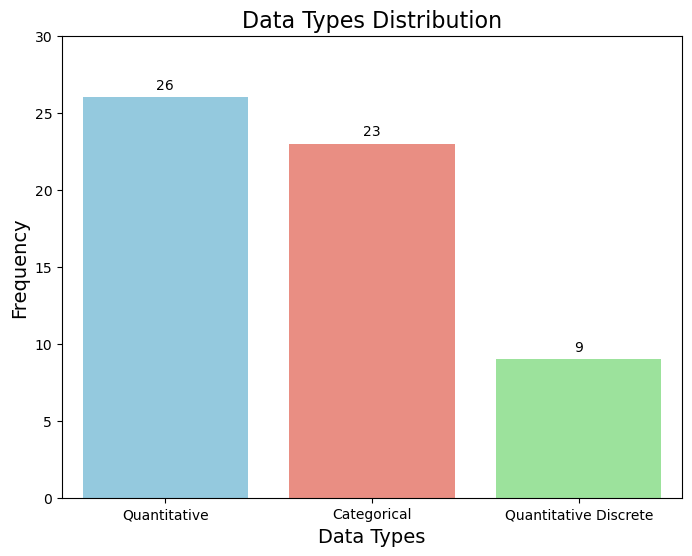

In [36]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(
    x='categories', 
    y='counts', 
    data=plot_data,
    hue='categories',
    palette=['skyblue', 'salmon', 'lightgreen'],
    ax=ax 
)

plt.ylim(0, 30)

# Add counts on top of bars
for index, value in enumerate(plot_data["counts"]):
    plt.text(index, value + 0.5, str(value), ha='center')

plt.title("Data Types Distribution", fontsize=16)
plt.xlabel("Data Types", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()

In [40]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(train_churn_df[quantitative_columns].describe())


Summary Statistics:
         CustomerID  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
count  5.104700e+04    50891.000000    50891.000000          50891.000000   
mean   3.201957e+06       58.834492      525.653416             46.830088   
std    1.169056e+05       44.507336      529.871063             23.848871   
min    3.000002e+06       -6.170000        0.000000            -11.000000   
25%    3.100632e+06       33.610000      158.000000             30.000000   
50%    3.201534e+06       48.460000      366.000000             45.000000   
75%    3.305376e+06       71.065000      723.000000             60.000000   
max    3.399994e+06     1223.380000     7359.000000            400.000000   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
count           50891.000000    50891.000000  50891.000000       50680.000000   
mean                0.895229       40.027785      1.236244         -11.547908   
std                 2.228546       96.5880

## Data Missingness
1. **Missing Data Assessment**
    - Use methods like `isnull().sum()` to identify and quantify missing values in each feature.
    - Visualise patterns in missingness, if any, using a library like missingno to understand the extent and distribution of missing values.

In [41]:
#Check columns and rows
print(f'Columns with at least one NaN value: {train_churn_df.isna().any(axis=0).sum()}')
print(f'Rows with at least one NaN value: {train_churn_df.isna().any(axis=1).sum()}')


Columns with at least one NaN value: 14
Rows with at least one NaN value: 1295


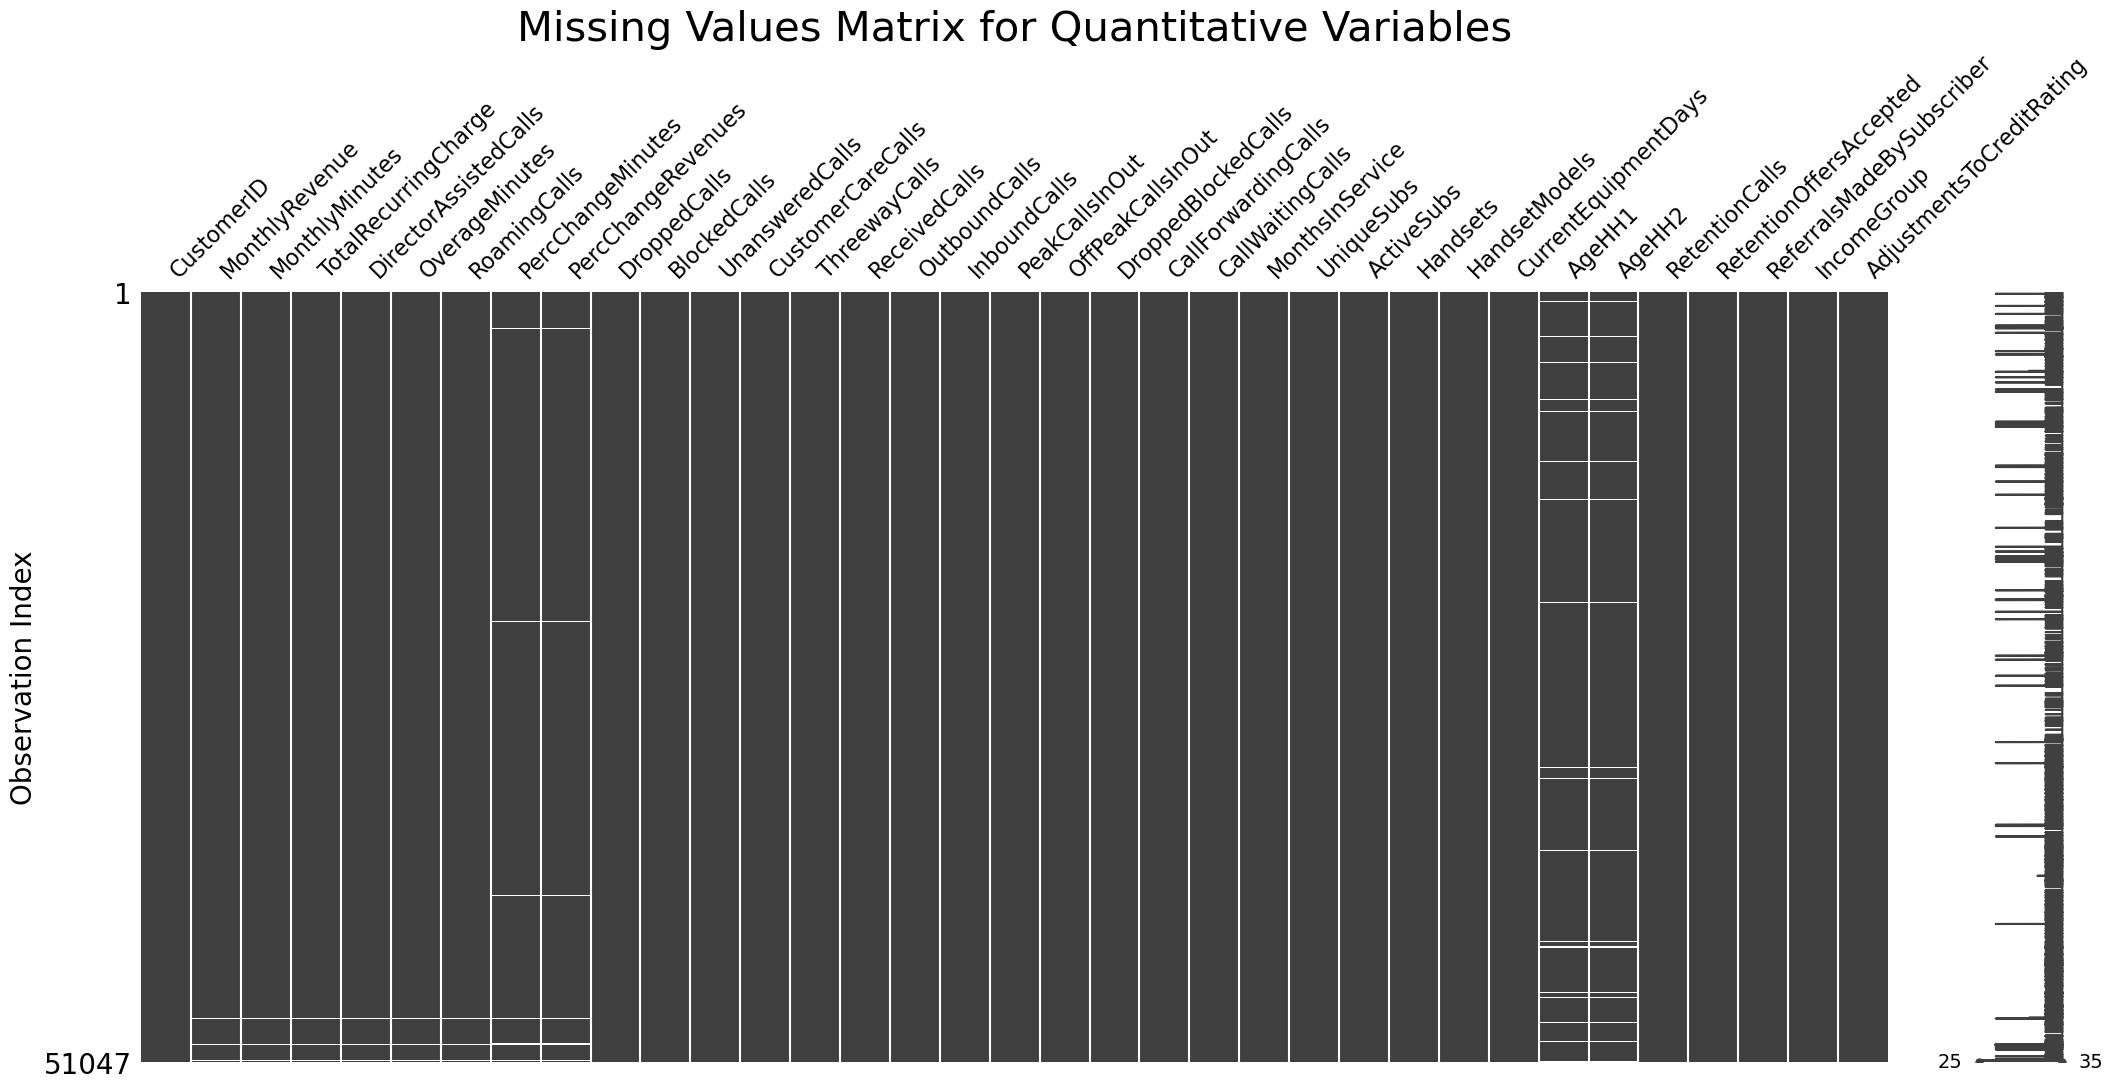

In [42]:
msno.matrix(train_churn_df[quantitative_columns])
plt.title("Missing Values Matrix for Quantitative Variables", fontsize = 30)
plt.ylabel("Observation Index", fontsize = 20)
plt.show()

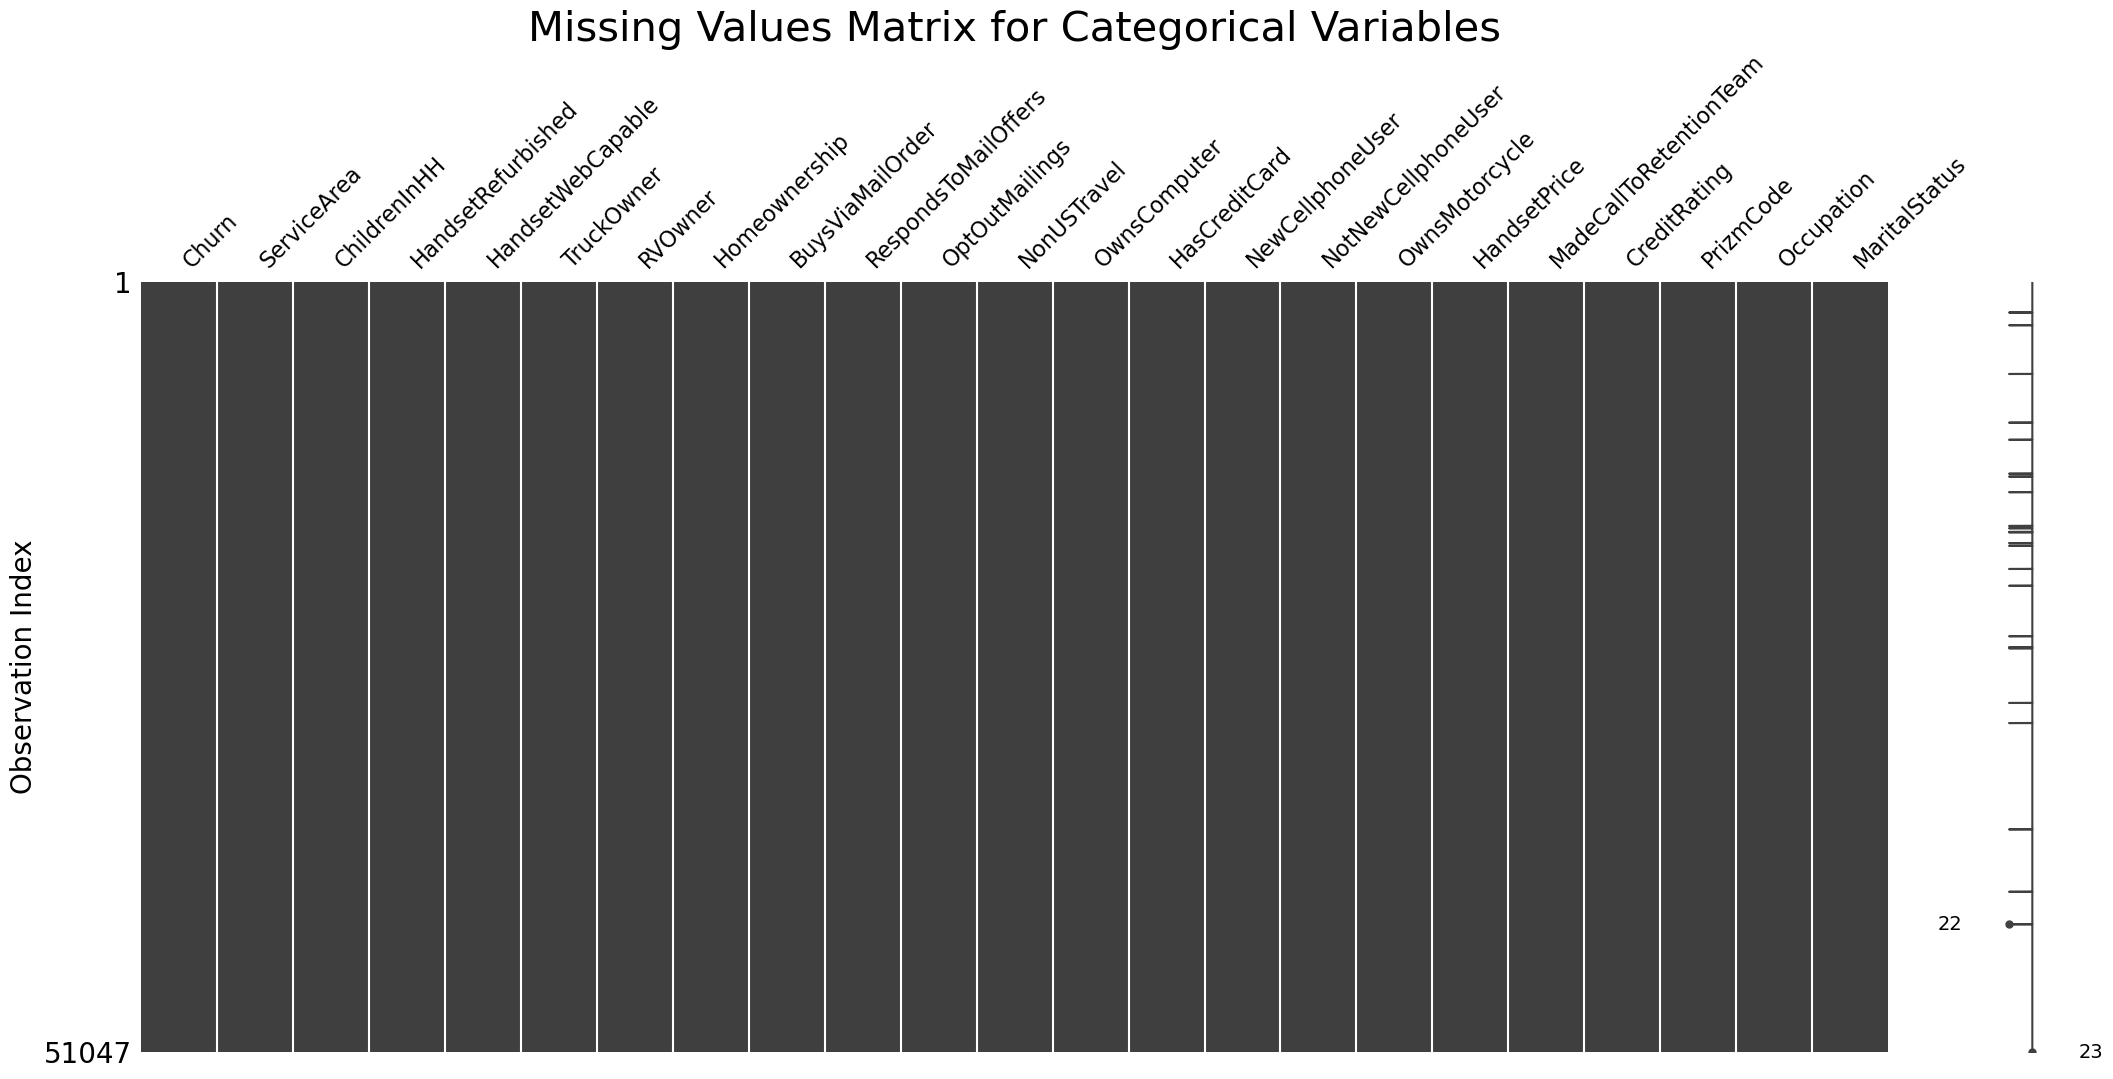

In [43]:
msno.matrix(train_churn_df[categorical_columns])
plt.title("Missing Values Matrix for Categorical Variables", fontsize = 30)
plt.ylabel("Observation Index", fontsize = 20)
plt.show()

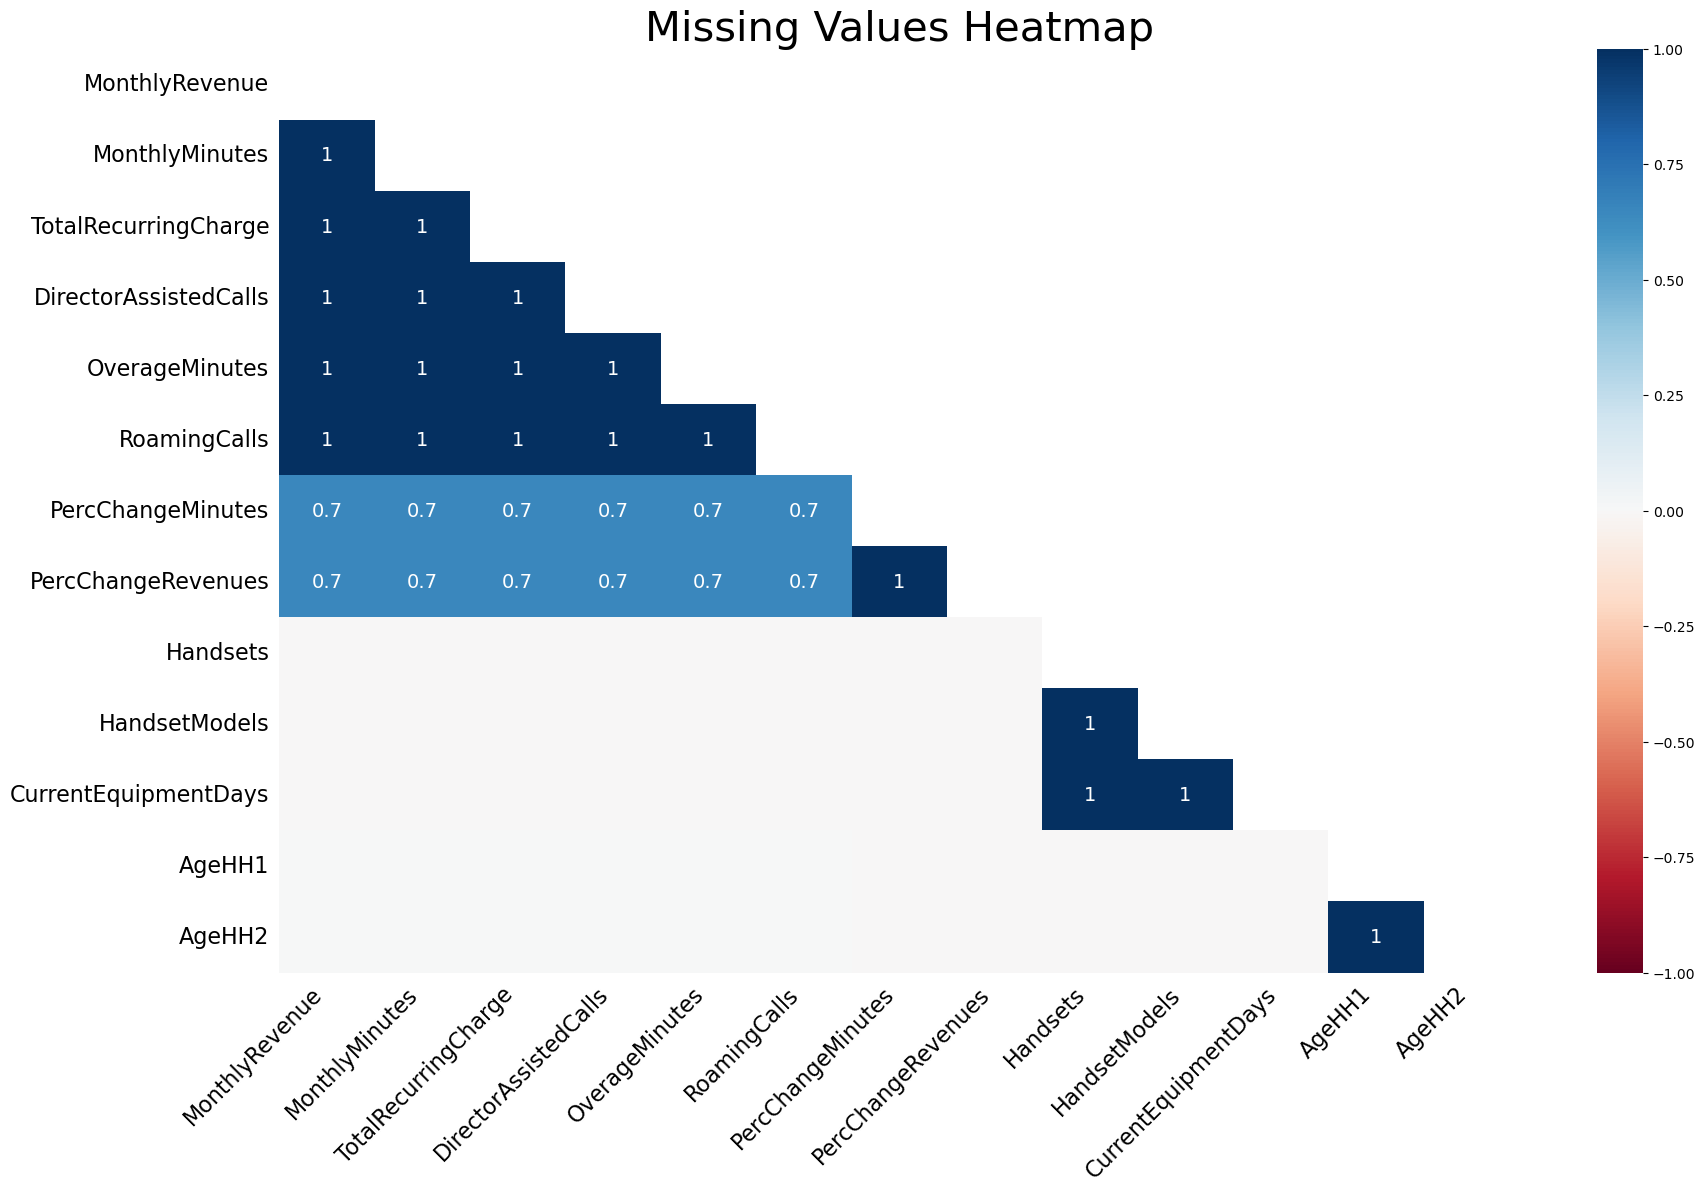

In [30]:
#Missingno heatmap

msno.heatmap(train_churn_df[quantitative_columns].sample(50000))
plt.title("Missing Values Heatmap", fontsize = 30);

This **msno heatmap** shows correlation in missingness between columns. 

1. **Dark Blue (1.0)**: Indicates a perfect correlation (e.g., `MonthlyRevenue` and `MonthlyMinutes`'s missing values are perfectly correlated).
2. **Lighter Blue (0.7)**: Shows a moderate correlation, meaning these columns (e.g., `PercChangeMinutes` and `PercChangeRevenues`) often have missing values together.
3. **White**: Represents no correlation, suggesting these columns have independent missingness patterns.


Missing Values Summary:


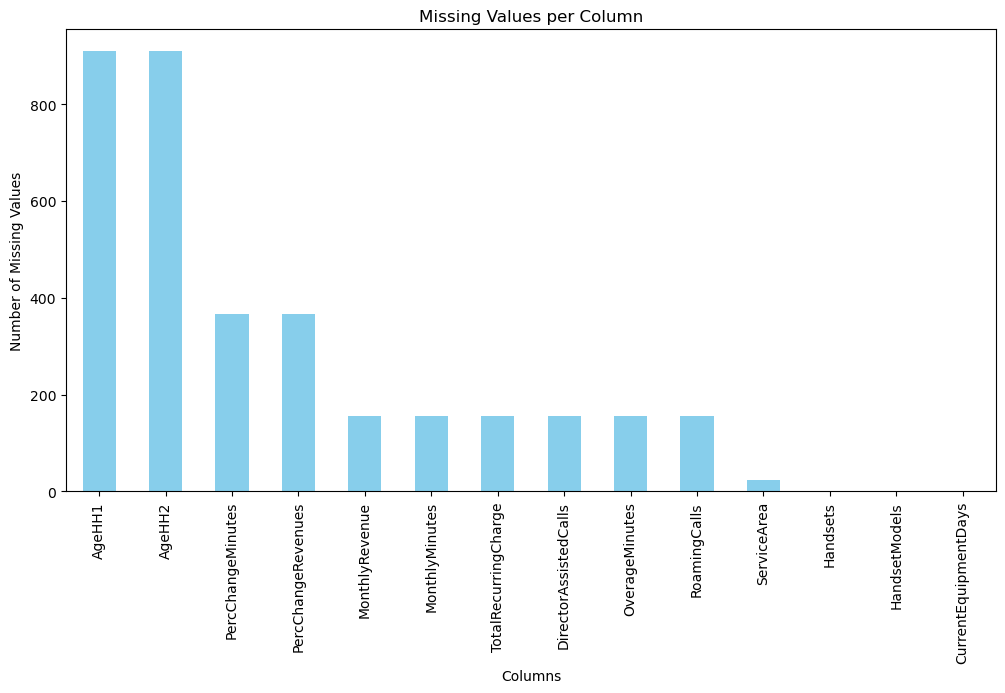

In [27]:
# Check for missing values
print("\nMissing Values Summary:")
missing_values = train_churn_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Plot missing values per column including those with zero missing values
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

The left hand side looks like there are no missing values but there is only one for each of those features.

## Data Imputation

1. **Random Regression Imputation**

In [46]:
# New users should have percent change in revenue and minutes as 0
# Set 'PercChangeRevenues' and 'PercChangeMinutes' to 0 
# for users with 'NewCellphoneUser' == "Yes"
train_churn_df.loc[
    train_churn_df['NewCellphoneUser'] == "Yes", 
    ['PercChangeRevenues', 'PercChangeMinutes']
] = 0

train_churn_df.isna().sum(axis=0)

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            331
PercChangeRevenues           331
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [47]:
# Set the future behavior option
pd.set_option('future.no_silent_downcasting', True)

df_imputed = train_churn_df.copy() 
# Replace "Yes"/"No" with binary values
df_imputed = df_imputed.replace({'Yes': 1, 'No': 0})
# Drop all categorical variables
df_imputed = df_imputed.select_dtypes(exclude=['object'])
df_imputed_categorical = train_churn_df.select_dtypes(include=['object'])

In [48]:
missing_counts = df_imputed.isna().sum(axis=0)
missing_columns = missing_counts[missing_counts > 0].index

In [49]:
# Columns with missing values to impute
columns_to_impute = missing_columns

# Loop through each column and fit a Linear Regression model to predict the missing values
# 
for column in columns_to_impute:
    # Separate rows with and without missing values in the target column
    df_known = df_imputed[df_imputed[column].notna()]
    df_missing = df_imputed[df_imputed[column].isna()]

    # Select features for the model
    features = df_imputed.columns.difference([column])
    
    # Define training data and replace NaNs with 0
    X_known = df_known[features].fillna(0)  # Replace NaNs with 0 in features for now
    y_known = df_known[column].fillna(0)    # Replace NaNs with 0 in target for now
    
    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_known, y_known)
    
    # Predict missing values for this column
    X_missing = df_missing[features].fillna(0)  # Replace NaNs with 0 in missing data

    predicted_values = model.predict(X_missing)
    random_noise = np.random.normal(loc=0, scale=y_known.std(), size=predicted_values.shape)
    df_imputed.loc[df_imputed[column].isna(), column] = predicted_values + random_noise

# check
df_imputed.isna().sum(axis=0)

train_churn_df = pd.concat([df_imputed, df_imputed_categorical], axis=1)


## Data Imbalance
1. **Class Imbalance Check**
    - Inspect the distribution of your target variable (churn vs. non-churn) to assess if an imbalance exists. 
    - Use a bar plot to visualise this distribution.


2. **Resampling Methods**
    - Oversampling: Apply random oversampling to increase the instances of the minority class if an imbalance is found.
    - Undersampling: Randomly undersample the majority class to create a balanced dataset, particularly if the majority class is large enough to allow data reduction without significant information loss.
    - SMOTE: Use Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic samples for the minority class.
    - Documentation: Describe the imbalance handling technique chosen and provide a brief justification for its suitability in your context.



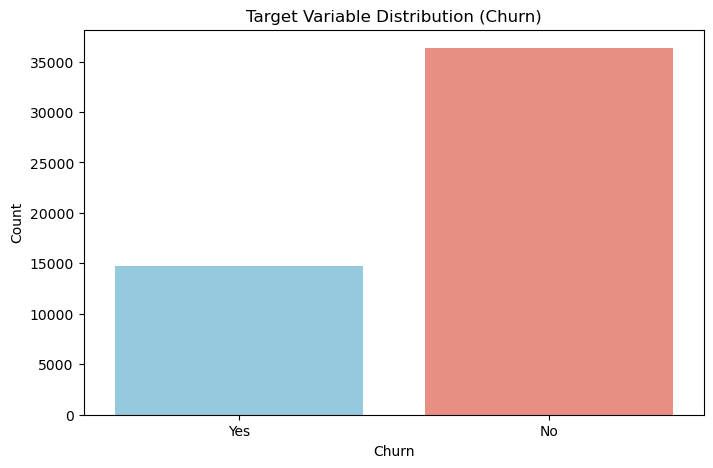

Class Distribution:
Churn
No     36336
Yes    14711
Name: count, dtype: int64

Imbalance Ratio: 0.40


In [53]:
# Visualize the initial distribution of the target variable
if 'Churn' in train_churn_df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        data=train_churn_df, 
        x='Churn', 
        hue='Churn',
        palette=['skyblue', 'salmon']
    )
    plt.title('Target Variable Distribution (Churn)')
    plt.ylabel('Count')
    plt.xlabel('Churn')
    plt.show()

    # Check the imbalance
    churn_counts = train_churn_df['Churn'].value_counts()
    print("Class Distribution:")
    print(churn_counts)

    # Calculate imbalance ratio
    imbalance_ratio = churn_counts.min() / churn_counts.max()
    print(f"\nImbalance Ratio: {imbalance_ratio:.2f}")



In [54]:
# Define the target column and features
X = train_churn_df.drop(columns=['Churn'])  # Features (drop target column)
y = train_churn_df['Churn']                 # Target column

# Apply RandomOverSampler to balance the dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the new class distribution
print("\nClass distribution after oversampling:")
y_resampled.value_counts(normalize=True).reset_index()


Class distribution after oversampling:


,Churn,proportion
0,Yes,0.5
1,No,0.5


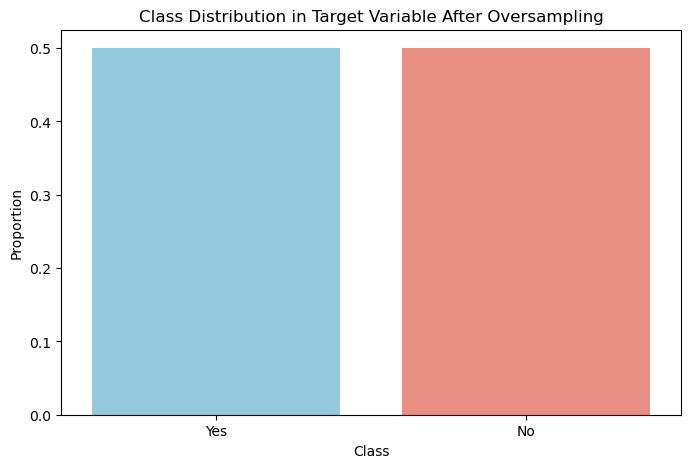

In [55]:
# Plot the new class distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plot_data = y_resampled.value_counts(normalize=True).reset_index()
sns.barplot(
    x='Churn', 
    y='proportion',
    hue='Churn',
    palette=['skyblue', 'salmon'],
    data=plot_data,
    ax=ax,
)
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.title("Class Distribution in Target Variable After Oversampling")
plt.show()

In [56]:
plot_data

,Churn,proportion
0,Yes,0.5
1,No,0.5


## Data Scaling 

- Scaling Requirement Analysis:
    - Analyse the range and variance of quantitative features to determine if scaling is necessary. 

- Scaling Technique
    - Standardisation: Apply standardisation (StandardScaler in sklearn) if features follow a Gaussian distribution.
    - Normalisation: Use Min-Max normalisation (MinMaxScaler) if the data has outliers or varies widely in range.
    - Implementation: Apply scaling methods only to the quantitative variables and not to categorical features.

In [57]:
train_churn_df.isna().sum(axis=0)

CustomerID                    0
MonthlyRevenue                0
MonthlyMinutes                0
TotalRecurringCharge          0
DirectorAssistedCalls         0
OverageMinutes                0
RoamingCalls                  0
PercChangeMinutes             0
PercChangeRevenues            0
DroppedCalls                  0
BlockedCalls                  0
UnansweredCalls               0
CustomerCareCalls             0
ThreewayCalls                 0
ReceivedCalls                 0
OutboundCalls                 0
InboundCalls                  0
PeakCallsInOut                0
OffPeakCallsInOut             0
DroppedBlockedCalls           0
CallForwardingCalls           0
CallWaitingCalls              0
MonthsInService               0
UniqueSubs                    0
ActiveSubs                    0
Handsets                      0
HandsetModels                 0
CurrentEquipmentDays          0
AgeHH1                        0
AgeHH2                        0
RetentionCalls                0
Retentio

In [68]:
train_churn_df.ServiceArea.value_counts()

ServiceArea
NYCBRO917    1684
HOUHOU281    1510
DALDAL214    1498
NYCMAN917    1182
APCFCH703     783
             ... 
OHIRAV330       1
OMANEW515       1
KCYHES316       1
AIRGEO843       1
NCRDNN910       1
Name: count, Length: 747, dtype: int64

In [58]:
# quan_continuous_features = ['feature1', 'feature2', ...]
quan_cont_df = train_churn_df[quantitative_columns]

# Display the range and standard deviation of each feature
scaling_check = quan_cont_df.describe().T[['min', 'max', 'std']]
scaling_check['range'] = scaling_check['max'] - scaling_check['min']

print("Scaling Check for Quantitative Continuous Features:")
print(scaling_check)


Scaling Check for Quantitative Continuous Features:
                                    min           max            std  \
CustomerID                 3.000002e+06  3.399994e+06  116905.561666   
MonthlyRevenue            -1.632875e+02  1.223380e+03      44.640020   
MonthlyMinutes            -1.548355e+03  7.359000e+03     530.622669   
TotalRecurringCharge      -9.765203e+01  4.000000e+02      23.988919   
DirectorAssistedCalls     -5.893507e+00  1.593900e+02       2.229664   
OverageMinutes            -3.579107e+02  4.321000e+03      96.680896   
RoamingCalls              -3.910451e+01  1.112400e+03       9.843821   
PercChangeMinutes         -3.875000e+03  5.192000e+03     232.017110   
PercChangeRevenues        -1.107700e+03  2.483500e+03      36.524783   
DroppedCalls               0.000000e+00  2.217000e+02       9.043955   
BlockedCalls               0.000000e+00  3.843000e+02      10.946905   
UnansweredCalls            0.000000e+00  8.487000e+02      38.876194   
CustomerCare

## Implementing Scaling

### Scaling Requirement Analysis
To determine the appropriate scaling technique for each quantitative continuous feature, we analyzed the **range** and **standard deviation** of these features:

- **Large Range Features**: Features with a high range are likely to contain values that vary widely, potentially with outliers.
- **Moderate Range Features with Gaussian-Like Distribution**: Features with moderate ranges and approximate Gaussian distributions are good candidates for standardisation.

The analysis led to the following scaling decisions:

1. **Min-Max Normalization** (for features with large ranges):
   - **Features**: `MonthlyMinutes`, `OverageMinutes`, `PercChangeMinutes`, `ReceivedCalls`, `PeakCallsInOut`, `OffPeakCallsInOut`
   - **Reason**: These features have high ranges and may contain outliers or widely varying values. Min-Max scaling will bring these features into a 0-1 range without distorting the effect of outliers.

2. **Standardisation** (for Gaussian-distributed features with moderate ranges):
   - **Features**: `MonthlyRevenue`, `TotalRecurringCharge`, `DirectorAssistedCalls`, `DroppedCalls`, `BlockedCalls`, `UnansweredCalls`, `CustomerCareCalls`
   - **Reason**: These features have moderate ranges, and if their distributions are approximately Gaussian, standardization will center them around zero with unit variance.

3. **Special Cases**:
   - **`CustomerID`**: Likely an identifier, so no scaling is applied.
   - **Discrete Numeric Features**: Features such as `RetentionOffersAccepted`, `ReferralsMadeBySubscriber`, `IncomeGroup`, and `AdjustmentsToCreditRating` might be categorical or represent counts. These can be treated as categorical if needed or normalised.

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the lists of features based on the scaling decision
features_to_normalize = [
    'MonthlyMinutes', 'OverageMinutes', 'PercChangeMinutes', 
    'ReceivedCalls', 'PeakCallsInOut', 'OffPeakCallsInOut'
]

features_to_standardize = [
    'MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 
    'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls'
]

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply Min-Max Normalization
train_churn_df[features_to_normalize] = min_max_scaler.fit_transform(train_churn_df[features_to_normalize])

# Apply Standardization
train_churn_df[features_to_standardize] = standard_scaler.fit_transform(train_churn_df[features_to_standardize])


# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), features_to_standardize)
    ])

pipe = Pipeline([
    ('preprocessor', preprocessor),
])

pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['MonthlyRevenue',
                                                   'TotalRecurringCharge',
                                                   'DirectorAssistedCalls',
                                                   'DroppedCalls',
                                                   'BlockedCalls',
                                                   'UnansweredCalls',
                                                   'CustomerCareCalls'])]))])

In [64]:
# Verify the scaling by displaying a sample of the scaled features
print("\nSample of Scaled Data:")
scaled_df = pipe.fit_transform(train_churn_df)
scaled_df


Sample of Scaled Data:


array([[-0.77613446, -1.03047394, -0.28822887, ..., -0.30928425,
        -0.56562111, -0.36675176],
       [-0.93316997, -1.23890555, -0.40035448, ..., -0.37322989,
        -0.65822367, -0.36675176],
       [-0.46251146, -0.36349279, -0.40035448, ..., -0.37322989,
        -0.7276756 , -0.36675176],
       ...,
       [-2.07739237,  1.17171177,  1.74713151, ...,  0.01957906,
         6.65480658, -0.11165411],
       [-0.38167996, -1.03044225, -0.84664896, ..., -0.37322989,
        -0.7276756 , -0.36675176],
       [ 0.20780559, -0.44969196,  2.42281965, ..., -0.30928425,
         2.28962461, -0.11165411]])

In [60]:
pd.DataFrame(scaled_df, columns = pipe.get_feature_names_out())

,norm__MonthlyMinutes,norm__OverageMinutes,norm__PercChangeMinutes,norm__ReceivedCalls,norm__PeakCallsInOut,norm__OffPeakCallsInOut,std__MonthlyRevenue,std__TotalRecurringCharge,std__DirectorAssistedCalls,std__DroppedCalls,std__BlockedCalls,std__UnansweredCalls,std__CustomerCareCalls
0,0.198415,0.076494,0.410058,0.036102,0.027742,0.016274,-0.776134,-1.030474,-0.288229,-0.587303,-0.309284,-0.565621,-0.366752
1,0.174952,0.076494,0.427374,0.000000,0.002392,0.000678,-0.933170,-1.238906,-0.400354,-0.631532,-0.373230,-0.658224,-0.366752
2,0.174727,0.076494,0.427374,0.000149,0.000622,0.002509,-0.462511,-0.363493,-0.400354,-0.664703,-0.373230,-0.727676,-0.366752
3,0.321123,0.076494,0.427374,0.074395,0.265796,0.205940,0.529433,1.178901,0.155789,5.085049,0.330172,1.227267,0.477033
4,0.173829,0.076494,0.427374,0.000000,0.000000,0.000000,-0.929810,-1.238906,-0.400354,-0.664703,-0.373230,-0.727676,-0.366752
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,0.193474,0.101107,0.438971,0.021876,0.076673,0.022581,-1.254613,-2.149745,-1.225695,0.363618,-0.126582,0.514742,-0.366752
51043,0.369734,0.086112,0.440829,0.253120,0.152437,0.168373,0.818190,1.595764,0.043663,1.181852,-0.309284,0.334682,-0.366752
51044,0.643821,0.020021,0.441346,0.455096,0.650022,0.617278,-2.077392,1.171712,1.747132,7.263321,0.019579,6.654807,-0.111654
51045,0.122847,0.114886,0.386222,0.000000,0.000000,0.000000,-0.381680,-1.030442,-0.846649,-0.664703,-0.373230,-0.727676,-0.366752


### Milestone #2 Summary

- **Data Missingness**: Identified missing values and applied imputation (mean/median for continuous features, mode for categorical) to retain data completeness without introducing significant bias.

- **Data Imbalance**: Used Random Oversampling to balance the target classes, enhancing model performance on minority classes and reducing bias toward the majority.

- **Data Scaling**: Applied Min-Max Normalisation to features with large ranges and Standardisation to Gaussian-distributed features, ensuring consistency in feature scales for optimal model training.

**Impact on Modelling**: These preprocessing steps standardise the dataset, improve model accuracy, and make the data ready for effective visualisation and analysis.
